<a href="https://colab.research.google.com/github/martydom/startup-funding-prediction/blob/main/Devashish_Bose_Team_1_Startup_Funding_Prediction_Capstone_Project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predict whether a startup will get funded in the next three months. </u></b>

## <b> Problem Description </b>

### There has been a staggering growth in investments in young age startups in the last 5 years. A lot of big VC firms are increasingly getting interested in the startup funding space. You are given a task to predict whether a startup will get a funding in the next three months using app traction data and startup details. 

### This funding can be either seed funding, Series A, Series B, so on and so forth. 


## <b> Data Description </b>

### In the file, you have monthly data for the startup entities which contains information about various app traction performance.

### <b> In the given data, you have the following variables:
* ### UUID - Unique Identifier for a single startup entity
* ### Month - Month for which the app data is available
* ### Application category - The category to which an application belongs to
* ### Avg Session Time - Average time of the session in app during the month
* ### Total Session Time - (Avg session time / user) x Open rate = Total session time  #Ask Vikash
* ### Open_rate - No of times app has been opened by a user
* ### Reach - % of devices having the app installed
* ### Funding_ind - Indicator for a funded startup

## <b>Following variables are only available for funded startups:</b>
* ### Business models -  The business model of the startup                            
* ### City - the city where the startup is based out of
* ### Company Stage - the stage of the company
* ### Feed name - 
* ### Founded year - The year in which the startup was founded
* ### Latest funded date - The latest date in which the startup was funded
* ### MAU - % of reach which opened the app in the given month( Monthly Active Users)
* ### Overview - Overview of the startup
* ### Practice Areas - 
* ### Region - Region where the startup operates
* ### Total Funding - Total amount of funding till the month
* ### Uninstall Rate - Rate of uninstall of applications.



In [1]:
#Class for Storing Fitted Models
import pickle
class save_model:
  def __init__ (self,filepath):
    self.filepath = filepath

  def load(self,name = None):
    '''
    Name : if you know the name you can extract the exact model, else you can give a specific name to extract that model.
    '''
    model_file = open(self.filepath,'rb')
    try:
      models =  pickle.load(model_file)
    except:
      model_file = {}
    model_file.close()
    if name:
      return models[name]
    else:
      return models
    

  def save(self,model,name):
    try:
      models = self.load()
    except:
      models = {}
    models[name] = model
    model_file = open(self.filepath,'wb')
    pickle.dump(models,model_file)
    model_file.close()
    return f'Dumped Model {name}'
    
  def delete(self,name):
    try:
      models = self.load()
    except:
      return f'No Models in dump'
    try:
      models.pop(name)
    except:
      return f"ENTER A VALID NAME"
    model_file = open(self.filepath,'wb')
    pickle.dump(models,model_file)
    model_file.close()
    return f'{name} Deleted'

sm = save_model('/content/drive/MyDrive/AlmaBetter/Module 4/Week 4/Final_df')

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statistics as stats
import time
import datetime
import math
from sklearn.metrics import *
import collections

In [4]:
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Module 4/Week 4/data_driven_investment_1.csv')

In [ ]:
df.shape

(1502175, 20)

In [ ]:
sns.

In [ ]:
companies_funded = list(df[df['funding_ind']==1]['UUID'].unique())

In [ ]:
funded_df = df[df['funding_ind']==1]

In [ ]:
last_fund_dict = {}
for company in companies_funded:
  last_fund_dict[company] = datetime.datetime.strptime(funded_df[funded_df['UUID']==company]['Latest Funded Date'].values[0],'%Y-%m-%d')

In [ ]:
# UUID - Unique Identifier for a single startup entity
# Month - Month for which the app data is available
# Application category - The category to which an application belongs to
# Avg Session Time - Average time of the session in app during the month
# Total Session Time - (Avg session time / user) x Open rate = Total session time #Ask Vikash
# Open_rate - No of times app has been opened by a user
# Reach - % of devices having the app installed
# Funding_ind - Indicator for a funded startup

In [ ]:
use_df = df[['UUID', 'month', 'Application Category', 'Avg_Session_Time',
       'Open_Rate', 'Reach', 'Total_Session_Time','funding_ind']]

In [ ]:
# sns.heatmap(use_df.isnull())

In [ ]:
use_df['month'] = use_df['month'].apply(lambda x : datetime.datetime.strptime(str(x), '%Y%m%d'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
use_df['target'] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
def filter_target(x):
  if (last_fund_dict[x['UUID']] - x['month']).days < 84 and (last_fund_dict[x['UUID']] - x['month']).days > 0:
    return 1
  return 0

In [ ]:
for company in companies_funded:
  use_df.loc[use_df['UUID']== company, 'target'] = use_df.loc[use_df['UUID']== company,['UUID','month',]].apply(filter_target,axis=1)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


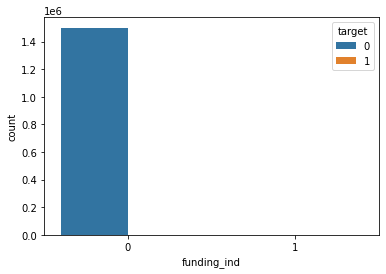

In [ ]:
sns.countplot(use_df['funding_ind'],hue = use_df['target'])

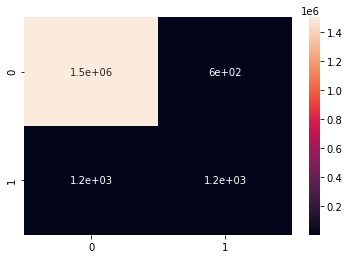

In [ ]:
sns.heatmap(confusion_matrix(use_df['funding_ind'],use_df['target']),annot = True)

In [ ]:
use_df.describe()

,Avg_Session_Time,Open_Rate,Reach,Total_Session_Time,funding_ind,target
count,877732.000000,877715.000000,1.050875e+06,877665.000000,1.502175e+06,1.502175e+06
mean,1.623425,3.940650,1.067470e-03,5.963737,1.607003e-03,1.177626e-03
std,2.253530,4.537119,1.690396e-02,9.593691,4.005523e-02,3.429635e-02
min,0.000033,1.000000,0.000000e+00,0.000033,0.000000e+00,0.000000e+00
25%,0.417683,1.875000,3.022203e-07,1.085473,0.000000e+00,0.000000e+00
50%,0.889808,2.933333,5.137744e-06,2.726575,0.000000e+00,0.000000e+00
75%,1.917317,4.500000,7.543001e-05,6.613983,0.000000e+00,0.000000e+00
max,58.561333,80.000000,9.990408e-01,149.983317,1.000000e+00,1.000000e+00


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


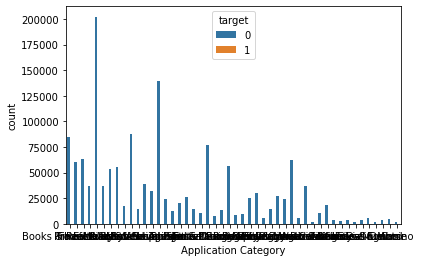

In [ ]:
sns.countplot(use_df['Application Category'],hue=use_df['target'])

In [ ]:
total_company_list = list(use_df['UUID'].unique())

In [ ]:
# for company in total_company_list:
#   use_df['prev1_month_data_tot_session'] = 

How accurte is the formula Avg Time * Open rate  =  total time

In [ ]:
r2_score((use_df[['Avg_Session_Time','Open_Rate','Total_Session_Time']].dropna()['Avg_Session_Time']*use_df[['Avg_Session_Time','Open_Rate','Total_Session_Time']].dropna()['Open_Rate']).values,use_df[['Avg_Session_Time','Open_Rate','Total_Session_Time']].dropna()['Total_Session_Time'].values)

0.6135442489323826

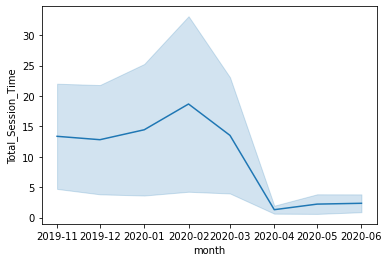

In [ ]:
sns.lineplot(x = use_df[use_df['UUID']==companies_funded[200]]['month'],y = use_df[use_df['UUID']==companies_funded[200]]['Total_Session_Time'])

In [ ]:
aggregated_df=use_df.pivot_table(index=["UUID",'month'],aggfunc=np.median).interpolate().ffill().bfill()

In [ ]:
new1_df = aggregated_df.groupby(['UUID','month']).agg(np.mean)

In [ ]:
new1_df.describe()

,Avg_Session_Time,Open_Rate,Reach,Total_Session_Time,funding_ind,target
count,757290.000000,757290.000000,7.572900e+05,757290.000000,757290.00000,757290.000000
mean,1.399837,3.767794,4.826184e-04,5.115279,0.00156,0.001315
std,1.793537,3.868911,9.901914e-03,7.843235,0.03946,0.036242
min,0.000033,1.000000,0.000000e+00,0.000033,0.00000,0.000000
25%,0.475132,2.000000,3.986890e-07,1.263328,0.00000,0.000000
50%,0.869276,2.886522,4.889378e-06,2.668812,0.00000,0.000000
75%,1.618981,4.266230,5.948161e-05,5.610140,0.00000,0.000000
max,57.053500,80.000000,9.990408e-01,149.670583,1.00000,1.000000


In [ ]:
def conv1(x):
  if x>0:
    return 1
  return 0

In [ ]:
new1_df['funding_ind'] = new1_df['funding_ind'].apply(conv1)
new1_df['target'] = new1_df['target'].apply(conv1)

In [ ]:
new1_df

Avg_Session_Time  ...  target
UUID                                     month                         ...        
000066f130e3b972364c505c805e2cddee68816d 2020-03-01          1.471044  ...       0
                                         2020-04-01          1.471044  ...       0
                                         2020-06-01          1.471044  ...       0
0000c4128bc8bb7dbfbc68f2afec85f485dbcc6b 2020-04-01          1.471044  ...       0
0000d19d56df9df1f266fc1fd245a37ff27fb1f3 2020-02-01          1.471044  ...       0
...                                                               ...  ...     ...
ffff67b9dfc65a5f1f146d681497a933998c2256 2020-06-01          1.516300  ...       0
ffff74dbc24df592b6355be32f5a71adeefb3b48 2020-04-01          0.789208  ...       0
ffff99e9bacd6d34b2823a0bac8b3e137d3b35ac 2020-02-01          0.062117  ...       0
                                         2020-03-01          0.062117  ...       0
                                         2020-04-01          0.062117  ...       0

[757290 rows x 6 columns]

In [ ]:
new1_df = new1_df.reset_index()

In [ ]:
sm.save(new1_df,'Filled_dataframe')

'Dumped Model Filled_dataframe'

# **Add application category**

In [ ]:
new1_df

,UUID,month,Avg_Session_Time,Open_Rate,Reach,Total_Session_Time,funding_ind,target
0,000066f130e3b972364c505c805e2cddee68816d,2020-03-01,1.471044,3.000000,1.972088e-07,4.413133,0,0
1,000066f130e3b972364c505c805e2cddee68816d,2020-04-01,1.471044,3.000000,3.022203e-07,4.413133,0,0
2,000066f130e3b972364c505c805e2cddee68816d,2020-06-01,1.471044,3.000000,4.889378e-06,4.413133,0,0
3,0000c4128bc8bb7dbfbc68f2afec85f485dbcc6b,2020-04-01,1.471044,3.000000,3.022203e-07,4.413133,0,0
4,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,2020-02-01,1.471044,3.000000,1.334363e-06,4.413133,0,0
...,...,...,...,...,...,...,...,...
757285,ffff67b9dfc65a5f1f146d681497a933998c2256,2020-06-01,1.516300,1.714286,4.889378e-06,1.516300,0,0
757286,ffff74dbc24df592b6355be32f5a71adeefb3b48,2020-04-01,0.789208,1.357143,6.044405e-07,0.789208,0,0
757287,ffff99e9bacd6d34b2823a0bac8b3e137d3b35ac,2020-02-01,0.062117,1.000000,4.008247e-07,0.062117,0,0
757288,ffff99e9bacd6d34b2823a0bac8b3e137d3b35ac,2020-03-01,0.062117,1.000000,1.972088e-07,0.062117,0,0


In [ ]:
temp = use_df.groupby(['UUID','month']).agg(list)

In [ ]:
temp = temp.reset_index()

In [ ]:
new1_df['app_cat'] = temp['Application Category'].apply(lambda x : x[-1])

In [ ]:
for i in range(1,4):
  a = collections.deque(new1_df['Avg_Session_Time'])
  a.rotate(i)
  new1_df['Avg_Session_Time_'+str(i)] = pd.Series(list(a))

  a = collections.deque(new1_df['Total_Session_Time'])
  a.rotate(i)
  new1_df['Total_Session_Time'+str(i)] = pd.Series(list(a))
  
  a = collections.deque(new1_df['Open_Rate'])
  a.rotate(i)
  new1_df['Open_Rate'+str(i)] = pd.Series(list(a))

  a = collections.deque(new1_df['Reach'])
  a.rotate(i)
  new1_df['Reach'+str(i)] = pd.Series(list(a))
  
  a = collections.deque(new1_df['UUID'])
  a.rotate(i)
  new1_df['UUID'+str(i)] = pd.Series(list(a))

In [ ]:
new1_df['keep'] = (new1_df['UUID3'] == new1_df['UUID']) == (new1_df['UUID2'] == new1_df['UUID1'])

In [ ]:
FINAL_DF = new1_df[new1_df['keep'] == True]

In [ ]:
FINAL_DF.columns

Index(['UUID', 'month', 'Avg_Session_Time', 'Open_Rate', 'Reach',
       'Total_Session_Time', 'funding_ind', 'target', 'app_cat',
       'Avg_Session_Time_1', 'Total_Session_Time1', 'Open_Rate1', 'Reach1',
       'UUID1', 'Avg_Session_Time_2', 'Total_Session_Time2', 'Open_Rate2',
       'Reach2', 'UUID2', 'Avg_Session_Time_3', 'Total_Session_Time3',
       'Open_Rate3', 'Reach3', 'UUID3', 'keep'],
      dtype='object')

In [ ]:
FINAL_DF.drop(columns=['UUID3','keep','UUID1','UUID2'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
sm.save(FINAL_DF,'Final Filled DF')

'Dumped Model Final Filled DF'

In [ ]:
FINAL_DF.shape

(549319, 21)

# **Final DF**

In [ ]:
FINAL_DF

,UUID,month,Avg_Session_Time,Open_Rate,Reach,Total_Session_Time,funding_ind,target,app_cat,Avg_Session_Time_1,Total_Session_Time1,Open_Rate1,Reach1,Avg_Session_Time_2,Total_Session_Time2,Open_Rate2,Reach2,Avg_Session_Time_3,Total_Session_Time3,Open_Rate3,Reach3
1,000066f130e3b972364c505c805e2cddee68816d,2020-04-01,1.471044,3.000000,3.022203e-07,4.413133,0,0,Business,1.471044,4.413133,3.000000,1.972088e-07,0.062117,0.062117,1.000000,3.022203e-07,0.062117,0.062117,1.000000,1.972088e-07
4,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,2020-02-01,1.471044,3.000000,1.334363e-06,4.413133,0,0,Social,1.471044,4.413133,3.000000,3.022203e-07,1.471044,4.413133,3.000000,4.889378e-06,1.471044,4.413133,3.000000,3.022203e-07
5,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,2020-03-01,1.224933,2.500000,2.366506e-06,3.431500,0,0,Social,1.471044,4.413133,3.000000,1.334363e-06,1.471044,4.413133,3.000000,3.022203e-07,1.471044,4.413133,3.000000,4.889378e-06
7,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,2020-05-01,0.732711,1.500000,2.042943e-05,1.468233,0,0,Social,0.978822,2.449867,2.000000,9.066608e-07,1.224933,3.431500,2.500000,2.366506e-06,1.471044,4.413133,3.000000,1.334363e-06
8,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,2020-06-01,0.486600,1.000000,4.889378e-06,0.486600,0,0,Social,0.732711,1.468233,1.500000,2.042943e-05,0.978822,2.449867,2.000000,9.066608e-07,1.224933,3.431500,2.500000,2.366506e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757283,ffff67b9dfc65a5f1f146d681497a933998c2256,2020-04-01,1.843433,1.227273,3.777753e-06,1.898486,0,0,Books & Reference,0.531750,1.142343,1.222222,4.239990e-06,0.803216,0.803216,1.000000,2.407085e-04,2.006919,2.325152,1.192308,2.818700e-04
757284,ffff67b9dfc65a5f1f146d681497a933998c2256,2020-05-01,0.790074,1.083333,2.042943e-05,0.844964,0,0,Education,1.843433,1.898486,1.227273,3.777753e-06,0.531750,1.142343,1.222222,4.239990e-06,0.803216,0.803216,1.000000,2.407085e-04
757285,ffff67b9dfc65a5f1f146d681497a933998c2256,2020-06-01,1.516300,1.714286,4.889378e-06,1.516300,0,0,Education,0.790074,0.844964,1.083333,2.042943e-05,1.843433,1.898486,1.227273,3.777753e-06,0.531750,1.142343,1.222222,4.239990e-06
757287,ffff99e9bacd6d34b2823a0bac8b3e137d3b35ac,2020-02-01,0.062117,1.000000,4.008247e-07,0.062117,0,0,Casual,0.789208,0.789208,1.357143,6.044405e-07,1.516300,1.516300,1.714286,4.889378e-06,0.790074,0.844964,1.083333,2.042943e-05


Rolling Mean

In [ ]:
FINAL_DF[['Open_Rate3','Open_Rate2','Open_Rate1','Open_Rate']].rolling(2,axis=1).mean()

,Open_Rate3,Open_Rate2,Open_Rate1,Open_Rate
1,NaN,1.000000,2.000000,3.000000
4,NaN,3.000000,3.000000,3.000000
5,NaN,3.000000,3.000000,2.750000
7,NaN,2.750000,2.250000,1.750000
8,NaN,2.250000,1.750000,1.250000
...,...,...,...,...
757283,NaN,1.096154,1.111111,1.224747
757284,NaN,1.111111,1.224747,1.155303
757285,NaN,1.224747,1.155303,1.398810
757287,NaN,1.398810,1.535714,1.178571


In [ ]:
df.groupby('UUID')

In [ ]:
df[df['Company Stage']=='Series A']

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
147,0de5c3fb8362718a71754d77061259c809266dd1,20180801,Parenting,NaN,Mom & Baby Care > Parenting > Community,Mumbai,Series A,Mom & Baby Care,2017.0,2018-09-10,NaN,NaN,Online parenting platform for pregnancy and ch...,Retail,0.000192,National,4087427.0,NaN,0.250000,1
212,1579dd1ed49a18f4f7520a91721c6e435f7c588e,20180801,Social,NaN,Social Platforms > Women,Delhi,Series A,Social Platforms,2013.0,2018-09-19,NaN,NaN,Web and mobile app based community for women,Consumer\nMedia & Entertainment,0.000703,National,4473029.0,NaN,0.274336,1
4345,876c0af8f2e85e61dabb2b8716fd4ca8833d6caa,20180801,Finance,NaN,Alternative Lending > Online Lenders > Consume...,Mumbai,Series A,Alternative Lending\nConsumer and SME Loans,2016.0,2018-09-11,NaN,NaN,Online personal loans platform,FinTech\nFinancial Services,0.000393,National,5493959.0,NaN,0.438356,1
5598,e93ec38f705d507686e4f1b7b3a11ff4c5bd0784,20180801,Tools,NaN,Payments > Business Payments > Agent Based Pay...,Bangalore,Series A,Payments\nBanking Tech,2013.0,2018-10-30,NaN,NaN,Agent-based payment and banking solution for c...,FinTech\nFinTech,0.000153,National,9973513.0,NaN,0.045455,1
5599,e93ec38f705d507686e4f1b7b3a11ff4c5bd0784,20180801,Tools,NaN,Payments > Business Payments > Agent Based Pay...,Bangalore,Series A,Payments\nBanking Tech,2013.0,2018-10-30,NaN,NaN,Agent-based payment and banking solution for c...,FinTech\nFinTech,0.000144,National,9973513.0,NaN,0.047619,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500586,30274688a665c39d0b9691836e24e2fb9afce6fe,20190101,Music & Audio,NaN,Crop Tech > Farming as a Service > Tech Enable...,Mumbai,Series A,Crop Tech,2009.0,2019-03-30,NaN,NaN,Provider of farming services to horticulture i...,Agriculture,0.000067,National,14634837.0,NaN,0.068966,1
1500587,30274688a665c39d0b9691836e24e2fb9afce6fe,20190101,Music & Audio,NaN,Crop Tech > Farming as a Service > Tech Enable...,Mumbai,Series A,Crop Tech,2009.0,2019-03-30,NaN,NaN,Provider of farming services to horticulture i...,Agriculture,0.000074,National,14634837.0,NaN,0.078947,1
1500588,30274688a665c39d0b9691836e24e2fb9afce6fe,20190101,Music & Audio,NaN,Crop Tech > Farming as a Service > Tech Enable...,Mumbai,Series A,Crop Tech,2009.0,2019-03-30,NaN,NaN,Provider of farming services to horticulture i...,Agriculture,0.000105,National,14634837.0,NaN,0.102041,1
1500589,30274688a665c39d0b9691836e24e2fb9afce6fe,20190101,Music & Audio,NaN,Crop Tech > Farming as a Service > Tech Enable...,Mumbai,Series A,Crop Tech,2009.0,2019-03-30,NaN,NaN,Provider of farming services to horticulture i...,Agriculture,0.000061,National,14634837.0,NaN,0.114286,1


In [ ]:
df[df['UUID']=='30274688a665c39d0b9691836e24e2fb9afce6fe']

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
803461,30274688a665c39d0b9691836e24e2fb9afce6fe,20180701,Music & Audio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000062,National,NaN,NaN,0.076923,0
803460,30274688a665c39d0b9691836e24e2fb9afce6fe,20180701,Music & Audio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000127,National,NaN,NaN,0.047619,0
803459,30274688a665c39d0b9691836e24e2fb9afce6fe,20180701,Music & Audio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000094,National,NaN,NaN,0.090909,0
803462,30274688a665c39d0b9691836e24e2fb9afce6fe,20180701,Music & Audio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000241,National,NaN,NaN,0.060000,0
803458,30274688a665c39d0b9691836e24e2fb9afce6fe,20180701,Music & Audio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000062,National,NaN,NaN,0.066667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653005,30274688a665c39d0b9691836e24e2fb9afce6fe,20200601,Music & Audio,4.037123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.428571,NaN,NaN,0.000005,National,NaN,8.270883,NaN,0
710187,30274688a665c39d0b9691836e24e2fb9afce6fe,20200601,Music & Audio,0.192517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.500000,NaN,NaN,NaN,National,NaN,0.592658,NaN,0
710186,30274688a665c39d0b9691836e24e2fb9afce6fe,20200601,Music & Audio,0.054333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,National,NaN,0.054333,NaN,0
652996,30274688a665c39d0b9691836e24e2fb9afce6fe,20200601,Music & Audio,6.170161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.685185,NaN,NaN,0.000103,National,NaN,23.709834,NaN,0


In [ ]:
df = sm.load('Final_df')

FileNotFoundError: ignored

In [ ]:
df[df['target']==1]

,UUID,Application Category,month,Avg_Session_Time,MAU,Open_Rate,Reach,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Avg_Session_Time_3,Avg_Session_Time_2,Avg_Session_Time_1,Open_Rate_3,Open_Rate_2,Open_Rate_1,Reach_3,Reach_2,Reach_1,Total_Session_Time_3,Total_Session_Time_2,Total_Session_Time_1,Uninstall_Rate_3,Uninstall_Rate_2,Uninstall_Rate_1,target,funding_ind_3,funding_ind_2,funding_ind_1,Total
397,0022cb351d65829b6604dac5347f5a94c9a458b4,19,2019-05-01,0.443922,0.366675,2.316690,5.050188e-05,1.410068e+06,0.975457,0.178571,0,0.414082,0.424029,0.433976,2.613745,2.514727,2.415708,3.963145e-05,0.000037,0.000046,0.997315,0.990029,0.982743,0.105263,0.041667,0.030303,1,1.0,0.0,0.0,1.0
398,0022cb351d65829b6604dac5347f5a94c9a458b4,19,2019-06-01,0.453869,0.362473,2.217672,6.480946e-05,1.410068e+06,0.968171,0.138889,0,0.424029,0.433976,0.443922,2.514727,2.415708,2.316690,3.697672e-05,0.000046,0.000051,0.990029,0.982743,0.975457,0.041667,0.030303,0.178571,1,1.0,1.0,0.0,2.0
399,0022cb351d65829b6604dac5347f5a94c9a458b4,19,2019-07-01,0.463816,0.358271,2.118654,8.584975e-05,1.410068e+06,0.960886,0.125000,0,0.433976,0.443922,0.453869,2.415708,2.316690,2.217672,4.641896e-05,0.000051,0.000065,0.982743,0.975457,0.968171,0.030303,0.178571,0.138889,1,1.0,1.0,1.0,3.0
400,0022cb351d65829b6604dac5347f5a94c9a458b4,19,2019-08-01,0.473762,0.354069,2.019635,1.023597e-04,1.410068e+06,0.953600,0.161290,1,0.443922,0.453869,0.463816,2.316690,2.217672,2.118654,5.050188e-05,0.000065,0.000086,0.975457,0.968171,0.960886,0.178571,0.138889,0.125000,1,0.0,1.0,1.0,2.0
401,0022cb351d65829b6604dac5347f5a94c9a458b4,19,2019-09-01,0.483709,0.349867,1.920617,1.107384e-04,1.410068e+06,0.946314,0.146667,1,0.453869,0.463816,0.473762,2.217672,2.118654,2.019635,6.480946e-05,0.000086,0.000102,0.968171,0.960886,0.953600,0.138889,0.125000,0.161290,1,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936593,fd964943c01a84bc2c54d747f6bd9bbf162c1673,8,2020-03-01,0.658575,0.441177,62.509208,1.033374e-04,5.136567e+07,47.522677,0.090141,0,0.605677,0.619173,0.655334,66.551958,72.573246,74.640973,4.720222e-05,0.000066,0.000085,46.831900,50.322056,55.536653,0.089656,0.089818,0.089979,1,1.0,1.0,0.0,2.0
940642,fecd3e454ec3795db4e1a98cbcff6543e04ca3f3,17,2020-03-01,3.282300,0.251101,1.000000,1.972088e-07,4.779987e+06,3.282300,0.041143,0,3.000552,1.540487,2.411393,3.000000,5.000000,3.000000,1.972088e-07,0.000003,0.000005,6.081525,7.702433,5.492367,0.041714,0.041524,0.041333,1,1.0,0.0,0.0,1.0
940647,fecd7c1ab55bf429eb709bdc07e2b95dc8df61d3,11,2020-02-01,3.566794,0.247524,7.709449,3.189251e-05,4.722333e+06,29.369065,0.040190,0,2.054065,1.638054,2.528360,7.603550,2.873994,5.006367,8.653123e-06,0.000016,0.000024,17.075082,4.739420,12.802947,0.040762,0.040571,0.040381,1,1.0,1.0,0.0,2.0
940648,fecd7c1ab55bf429eb709bdc07e2b95dc8df61d3,11,2020-03-01,2.534026,0.246808,5.146591,3.963897e-05,4.710802e+06,13.878996,0.040000,0,1.638054,2.528360,3.566794,2.873994,5.006367,7.709449,1.639959e-05,0.000024,0.000032,4.739420,12.802947,29.369065,0.040571,0.040381,0.040190,1,1.0,1.0,1.0,3.0


In [ ]:
df.columns

Index(['UUID', 'Application Category', 'month', 'Avg_Session_Time', 'MAU',
       'Open_Rate', 'Reach', 'Total Funding (USD)', 'Total_Session_Time',
       'Uninstall_Rate', 'funding_ind', 'Avg_Session_Time_3',
       'Avg_Session_Time_2', 'Avg_Session_Time_1', 'Open_Rate_3',
       'Open_Rate_2', 'Open_Rate_1', 'Reach_3', 'Reach_2', 'Reach_1',
       'Total_Session_Time_3', 'Total_Session_Time_2', 'Total_Session_Time_1',
       'Uninstall_Rate_3', 'Uninstall_Rate_2', 'Uninstall_Rate_1', 'target',
       'funding_ind_3', 'funding_ind_2', 'funding_ind_1', 'Total'],
      dtype='object')

In [ ]:
# rolling mean 
for col in ['Avg_Session_Time','Open_Rate', 'Reach']:
  for i in range(1,3):
    df[col+'_rm_'+str(i)] = 0
    for j in range(i):
      df[col+'_rm_'+str(i)] += df[col+'_'+str(i)]
    df[col+'_rm_'+str(i)]/=i+1

In [ ]:
df.head()

,UUID,Application Category,month,Avg_Session_Time,MAU,Open_Rate,Reach,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind,Avg_Session_Time_3,Avg_Session_Time_2,Avg_Session_Time_1,Open_Rate_3,Open_Rate_2,Open_Rate_1,Reach_3,Reach_2,Reach_1,Total_Session_Time_3,Total_Session_Time_2,Total_Session_Time_1,Uninstall_Rate_3,Uninstall_Rate_2,Uninstall_Rate_1,target,funding_ind_3,funding_ind_2,funding_ind_1,Total,Avg_Session_Time_rm_1,Avg_Session_Time_rm_2,Avg_Session_Time_rm_3,Open_Rate_rm_1,Open_Rate_rm_2,Open_Rate_rm_3,Reach_rm_1,Reach_rm_2,Reach_rm_3
12,00017d2a013dc43f0e34de1be4beca443713ec80,37,2020-03-01,0.661142,0.475634,1.000000,1.972088e-07,1410068.0,0.661142,0.026207,0,0.190200,0.277208,0.364217,2.000000,1.500000,1.000000,1.972088e-07,3.022203e-07,2.497145e-07,0.380400,0.372308,0.364217,0.026207,0.026207,0.026207,0,0.0,0.0,0.0,0.0,0.182108,0.184806,0.142650,0.500000,1.000000,1.500000,1.248573e-07,2.014802e-07,1.479066e-07
19,0002b4fc148aa1ddb3b0d2c9ea94d527a51f7c45,17,2020-04-01,1.196289,0.475634,3.460101,3.022203e-07,1410068.0,4.086250,0.026207,0,1.589457,0.829983,1.179251,8.500000,1.000000,3.166667,3.022203e-06,2.042943e-05,1.466813e-05,17.200417,0.829983,3.686958,0.026207,0.026207,0.026207,0,0.0,0.0,0.0,0.0,0.589625,0.553322,1.192093,1.583333,0.666667,6.375000,7.334067e-06,1.361962e-05,2.266652e-06
24,00033006be474a18f422eb285da9b761023b09e1,17,2020-02-01,1.048538,0.475634,4.401628,2.465110e-05,1410068.0,4.544112,0.026207,0,1.230366,1.270092,0.921560,4.046970,5.022036,4.606758,6.310682e-06,1.242416e-05,1.853763e-05,4.884833,5.914015,4.201288,0.026207,0.026207,0.026207,0,0.0,0.0,0.0,0.0,0.460780,0.846728,0.922775,2.303379,3.348024,3.035227,9.268815e-06,8.282771e-06,4.733012e-06
25,00033006be474a18f422eb285da9b761023b09e1,17,2020-03-01,1.138207,0.475634,4.229853,3.076458e-05,1410068.0,4.742779,0.026207,0,1.270092,0.921560,1.048538,5.022036,4.606758,4.401628,1.242416e-05,1.853763e-05,2.465110e-05,5.914015,4.201288,4.544112,0.026207,0.026207,0.026207,0,0.0,0.0,0.0,0.0,0.524269,0.614374,0.952569,2.200814,3.071172,3.766527,1.232555e-05,1.235842e-05,9.318117e-06
29,0003f21a34dc47d4d2f0d645c2015eead98ff7de,33,2020-03-01,1.092697,0.475634,3.804694,1.972088e-07,1410068.0,3.910919,0.026207,0,1.168498,1.166726,1.106371,3.905634,3.374384,3.511173,4.351972e-05,9.193242e-05,1.075663e-04,4.431994,3.518272,3.701186,0.026207,0.026207,0.026207,0,0.0,0.0,0.0,0.0,0.553186,0.777817,0.876373,1.755587,2.249589,2.929225,5.378316e-05,6.128828e-05,3.263979e-05
